In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Importo dataset

In [3]:
folder = './'

In [4]:
train = pd.read_csv(folder+"train.csv")
test = pd.read_csv(folder+"test.csv")
submission = pd.read_csv(folder+"sample_submission.csv")

In [5]:
train[:10]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
train.shape

(159571, 8)

In [7]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values

In [8]:
y[:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Divido entre train y valid

In [9]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train, y, test_size = 0.1)

# Analisis rapido

In [10]:
toxic_ratio = (Y_train.sum(axis = 1) > 0).sum()/Y_train.shape[0]
print(toxic_ratio)

0.10212167422169302


In [11]:
0.96-toxic_ratio + toxic_ratio*0.873

0.947030547373845

In [12]:
X_train.shape

(143613, 8)

In [13]:
raw_text_train = X_train["comment_text"].str.lower()
raw_text_valid = X_valid["comment_text"].str.lower()
raw_text_test = test["comment_text"].str.lower()

In [14]:
print(raw_text_train[0:10]) # Recordar que train_test_split hace shuffle 

85027     you're fast \n\nahhahahaha you're fast. didn't...
30637     for future reference, there is discussion here...
31211           you eat cats guts? \n\nthat is fuc*in gross
66024                      "under a claim of ""fair use"" "
92224     "\n\npasted here is the section i removed.  th...
101231    "\nthere is little point changing one page whe...
5610                       hello\nmother fucker hijo edputa
129250    the 3rr and you \n\ni responded to your commen...
31317     "\n\n surf rock \n\nthe cramps are not surf ro...
113969    su 30 mkm \n\nhey man thanks for chnages. can ...
Name: comment_text, dtype: object


In [15]:
Y_train[:10]

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Stemming o Lemmatizer

In [16]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [17]:
from nltk.stem.porter import PorterStemmer
import re
token_pattern=r"(?u)\b\w\w+\b"
compiled_reg_exp = re.compile(token_pattern)
def tokenize(text):
    tokens = compiled_reg_exp.findall(text)
    stems = []
    for item in tokens:
        if len(item)>100:
            item = 'tooLongWord'
        stems.append(PorterStemmer().stem(item))
    return stems

# Armo matriz de features

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 200000

tfidf_vectorizer = TfidfVectorizer(max_df=0.11, min_df=1,
                                   max_features=max_features,
                                   #tokenizer=tokenize,
                                   stop_words='english')

%time tfidf_matrix_train = tfidf_vectorizer.fit_transform(raw_text_train)

CPU times: user 4.76 s, sys: 40 ms, total: 4.8 s
Wall time: 4.8 s


In [19]:
%time tfidf_matrix_valid = tfidf_vectorizer.transform(raw_text_valid)

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 517 ms


In [20]:
%time tfidf_matrix_test = tfidf_vectorizer.transform(raw_text_test)

CPU times: user 4.55 s, sys: 0 ns, total: 4.55 s
Wall time: 4.55 s


## Sparsity

In [21]:
sparsity = 1 - (tfidf_matrix_train>0).sum()/(tfidf_matrix_train.shape[0]*tfidf_matrix_train.shape[1])
print(sparsity)

0.9998628691899131


## TFIDF Results

In [22]:
tfidf_matrix_train.shape

(143613, 178005)

sin lemma
- 177719 con 0.95, 1
- 177712 con 0.11, 1


In [23]:
top_10 = np.argsort(tfidf_matrix_train.sum(axis=0))[0,::-1][0,:10].tolist()[0]
feature_names = np.array(tfidf_vectorizer.get_feature_names())
print(feature_names[np.array(top_10)])

['thanks' 'edit' 'think' 'know' 'did' 'people' 'user' 'articles' 'use'
 'time']


## Sin reducción de dimensionalidad

In [24]:
dense_matrix_train = tfidf_matrix_train.todense()

MemoryError: 

In [ ]:
dense_matrix_train.shape, Y_train.shape

In [34]:
dense_matrix_valid = tfidf_matrix_valid.todense()

## Reducimos dimensionalidad

In [25]:
from sklearn.decomposition import TruncatedSVD

In [26]:
trunSVD = TruncatedSVD(n_components=300)
%time dense_matrix_train = trunSVD.fit_transform(tfidf_matrix_train)

CPU times: user 1min 8s, sys: 3.52 s, total: 1min 12s
Wall time: 27.7 s


In [27]:
%time dense_matrix_valid = trunSVD.transform(tfidf_matrix_valid)

CPU times: user 104 ms, sys: 32 ms, total: 136 ms
Wall time: 137 ms


In [28]:
dense_matrix_train.shape, dense_matrix_valid.shape

((143613, 300), (15958, 300))

In [30]:
%time dense_matrix_test = trunSVD.transform(tfidf_matrix_test)

CPU times: user 656 ms, sys: 52 ms, total: 708 ms
Wall time: 707 ms


# Modelo de 1 capa densa

In [29]:
from toxic_helper import auc

Using TensorFlow backend.


In [31]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from helper import PlotLosses
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from keras import regularizers
from keras import initializers

In [32]:
default_initializer = initializers.normal(mean=0, stddev=0.001)
# default_initializer = 'zeros'

In [33]:
input_features = dense_matrix_train.shape[1]
output_size = Y_train.shape[1]
hidden_units = 100
lambd = 0 #0.001
model_sig_nn = Sequential()
model_sig_nn.add(Dense(200,
                       input_dim=input_features, 
                       kernel_regularizer=regularizers.l2(lambd), 
                       kernel_initializer=default_initializer,
                       name="Capa_Oculta_1"))
model_sig_nn.add(Activation('sigmoid'))
model_sig_nn.add(Dense(200,
                       input_dim=input_features, 
                       kernel_regularizer=regularizers.l2(lambd), 
                       kernel_initializer=default_initializer,
                       name="Capa_Oculta_2"))
model_sig_nn.add(Activation('sigmoid'))
model_sig_nn.add(Dense(output_size,
                       kernel_regularizer=regularizers.l2(lambd), 
                       kernel_initializer=default_initializer,
                       name="Capa_Salida"))
model_sig_nn.add(Activation('sigmoid', name="output")) 
model_sig_nn.summary()


lr = 0.001 
batch_size = 256
epochs = 10

#selectedOptimizer = optimizers.SGD(lr=lr)
selectedOptimizer = optimizers.adam(lr=lr, decay=0.001)

model_sig_nn.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, 
                     metrics=['accuracy']) #auc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta_1 (Dense)        (None, 200)               60200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
Capa_Oculta_2 (Dense)        (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
Capa_Salida (Dense)          (None, 6)                 1206      
_________________________________________________________________
output (Activation)          (None, 6)                 0         
Total params: 101,606
Trainable params: 101,606
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_sig_nn.evaluate(dense_matrix_valid, Y_valid)

15958/15958 [==============================] - 9s 552us/step


[0.6953761111989268, 0.19965953120934005]

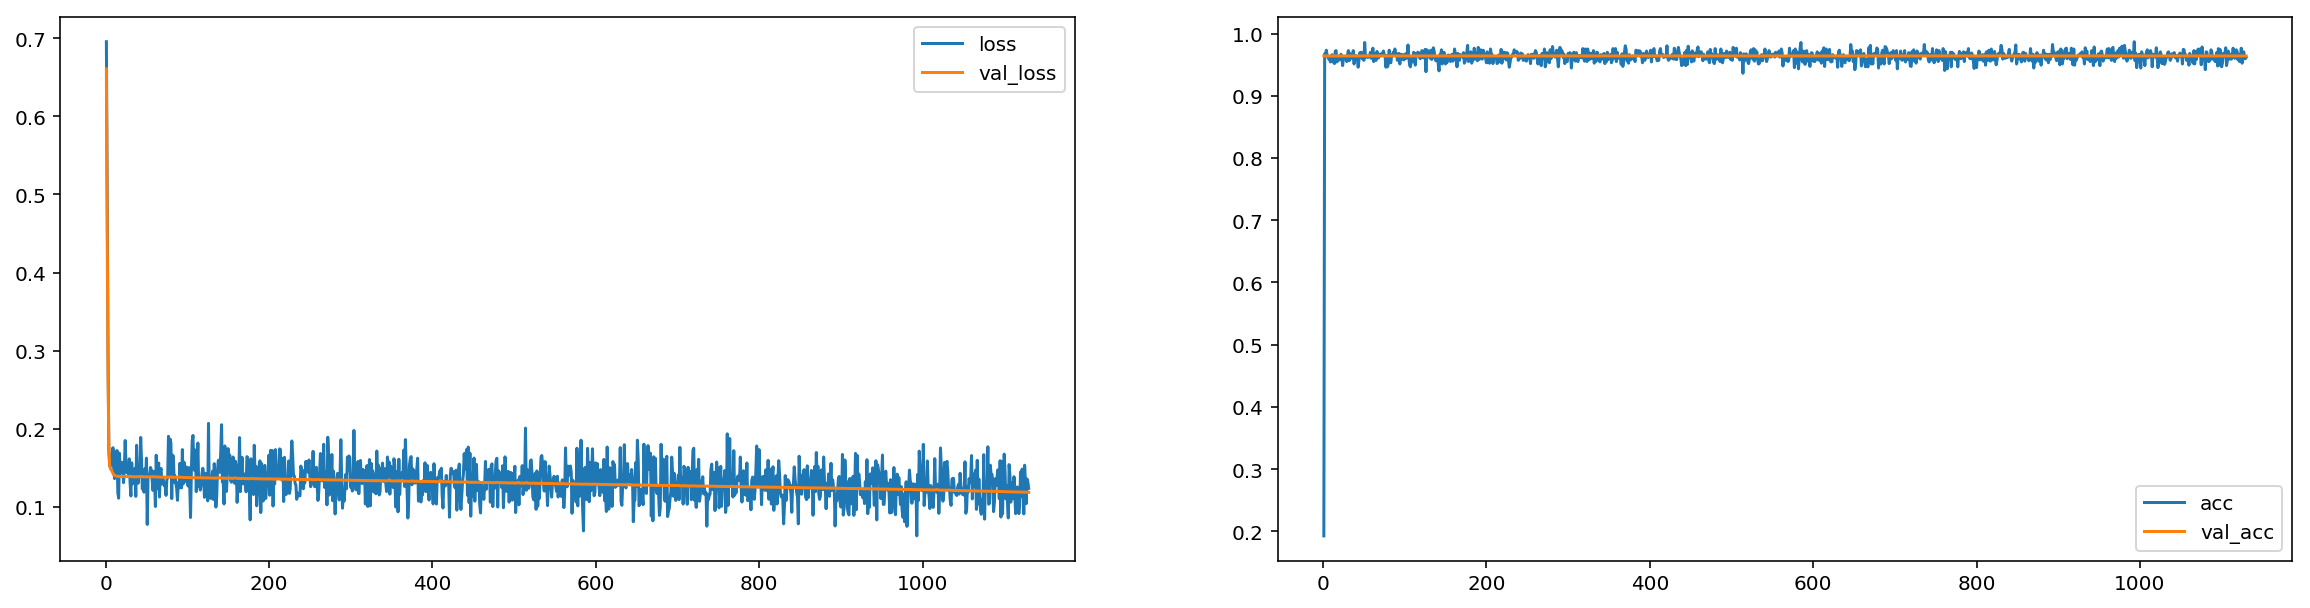


Epoch 00010: val_loss improved from 0.12237 to 0.11893, saving model to basic_model_best.hdf5


In [35]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='basic_model_best.hdf5', verbose=1, save_best_only=True)

plot_losses = PlotLosses(plot_interval=1, 
                         evaluate_interval=5, 
                         x_val=dense_matrix_valid, 
                         y_val_categorical=Y_valid)
history = model_sig_nn.fit(dense_matrix_train, 
          Y_train, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=1, 
          validation_data=(dense_matrix_valid, Y_valid), 
          callbacks=[plot_losses, checkpointer],
         )

# Evaluo valid

In [33]:
model_sig_nn.load_weights('basic_model_best.hdf5')

In [36]:
tfidf_matrix_valid.shape, Y_valid.shape

((15958, 178005), (15958, 6))

In [38]:
pred_valid = model_sig_nn.predict(dense_matrix_valid, verbose = 1)
pred_train = model_sig_nn.predict(dense_matrix_train, verbose = 1)
pred_test = model_sig_nn.predict(dense_matrix_test, verbose = 1)

153164/153164 [==============================] - 1s 9us/step


In [39]:
model_sig_nn.evaluate(dense_matrix_valid, Y_valid)

15958/15958 [==============================] - 0s 14us/step


[0.1189279634263196, 0.9641036861506691]

[0.073181636426992352, 0.97782721309109666]

# ROC Curve

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

print(roc_auc_score(Y_train, pred_train, average='macro'))
print(roc_auc_score(Y_valid, pred_valid, average='macro'))

0.9072495452125969
0.9184655156524127


0.930758815168  
0.920441587397

In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y_valid.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_valid[:, i], pred_valid[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_valid.ravel(), pred_valid.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

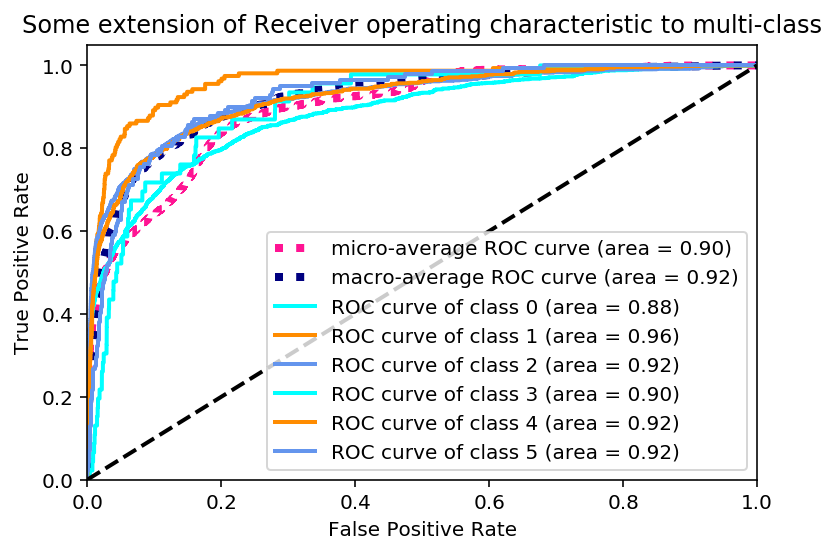

In [42]:
from matplotlib import pyplot as plt
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

**True Positive Rate**:   
The number of times your system was able to classify the positives as positives. 

True positive rate = Correctly Classified Positives/(Correctly Classified as Positives+ Falsely Classified as Negatives)

**False Positive Rate**:  
The number of times your system classified a negative as a positive divided by the total  actual negative instances.


False positive rate = Incorrectly Classified as Positives/(Incorrectly Classified as Positives+ Correctly classified as Negatives )

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin/16001

Macro-average: Calcula el score de cada clase y luego promedia  
Micro-average: Suma y luego calcula el score

Micro-average se considera mejor cuando hay desbalce en las clases

# Interpretación

- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

In [43]:
(model_sig_nn.get_weights()[0]).shape

(300, 200)

In [44]:
salida = 2
sorted_indexes = np.argsort(model_sig_nn.get_weights()[0][:,salida])[::-1]
np.array(tfidf_vectorizer.get_feature_names())[sorted_indexes][:20]

array(['00', '0006', '00098', '0003º', '00000', '0000', '00000000',
       '000b01c5b9f8', '000feet', '000080', '00075', '00000050',
       '0000030422', '000ft', '0001', '000k', '00262', '0000000', '00035',
       '0120487500'], dtype='<U4955')

# Predict for test

In [43]:
tfidf_matrix_test = tfidf_vectorizer.transform(raw_text_test)

In [44]:
dense_matrix_test = tfidf_matrix_test.todense()

MemoryError: 

In [45]:
pred = model_sig_nn.predict(dense_matrix_test, verbose=1)

NameError: name 'dense_matrix_test' is not defined

In [ ]:
pred.shape

In [ ]:
1*(pred[0:10]>0.5)

In [45]:
submission[list_classes] = pred_test
submission.to_csv("submission_TSVD_300.csv", index = False)

Submit1 ROC AUC en valid = 0.731196488262  
Submit2 ROC AUC en valid = 0.963410980044  
Submit3 ROC AUC en valid = 0.974042855266

In [ ]:
# ~/.local/bin/kaggle competitions submit -c jigsaw-toxic-comment-classification-challenge -f submission_early_stop_2_epochs.csv -m "Early stop 2 epochs"